In [1]:
import gc

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, LeaveOneOut, StratifiedKFold
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import models

random.seed(10)
print(random.random()) 

0.5714025946899135


In [24]:
df = pd.read_excel("default of credit card clients.xls", header=1).set_index("ID")
df = df.rename({"default payment next month": "default"}, axis=1)
df = df.rename({"LIMIT_BAL": "credit_score"}, axis=1)
df["credit_score"]/=10000

In [140]:
df

,credit_score,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,edu_0,edu_1,edu_2,edu_3,edu_4,marriage_0,marriage_1,marriage_2,marriage_3,pay_bill_rat
ID,,,,,,,,,,,,,,,,,,,,,
1,2.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.089434
2,12.0,2,2,2,26,-1,2,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.361899
3,9.0,2,2,2,34,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.110332
4,5.0,2,2,1,37,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.031657
5,5.0,1,2,1,57,-1,0,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.632416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,22.0,1,3,1,39,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.048000
29997,15.0,1,3,2,43,-1,-1,-1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.597347
29998,3.0,1,2,2,37,4,3,2,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.612057


In [26]:
df["credit_score"].describe()

count    30000.000000
mean        16.748432
std         12.974766
min          1.000000
25%          5.000000
50%         14.000000
75%         24.000000
max        100.000000
Name: credit_score, dtype: float64

In [27]:
print(df.columns), print(df.loc[:2])

Index(['credit_score', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')
    credit_score  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1            2.0    2          2         1   24      2      2     -1     -1   
2           12.0    2          2         2   26     -1      2      0      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...          0          0          0         0       689         0   
2       0  ...       3272       3455       3261         0      1000      1000   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  def

(None, None)

In [139]:
df["default"]

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default, Length: 27601, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   credit_score  30000 non-null  float64
 1   SEX           30000 non-null  int64  
 2   EDUCATION     30000 non-null  int64  
 3   MARRIAGE      30000 non-null  int64  
 4   AGE           30000 non-null  int64  
 5   PAY_0         30000 non-null  int64  
 6   PAY_2         30000 non-null  int64  
 7   PAY_3         30000 non-null  int64  
 8   PAY_4         30000 non-null  int64  
 9   PAY_5         30000 non-null  int64  
 10  PAY_6         30000 non-null  int64  
 11  BILL_AMT1     30000 non-null  int64  
 12  BILL_AMT2     30000 non-null  int64  
 13  BILL_AMT3     30000 non-null  int64  
 14  BILL_AMT4     30000 non-null  int64  
 15  BILL_AMT5     30000 non-null  int64  
 16  BILL_AMT6     30000 non-null  int64  
 17  PAY_AMT1      30000 non-null  int64  
 18  PAY_AMT2      30000 non-nu

In [29]:
df.isna().sum()

credit_score    0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_0           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
default         0
dtype: int64

In [30]:
df.describe()

,credit_score,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,16.748432,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,12.974766,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,14.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,24.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,100.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [31]:
"""
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

"""

'\nThis research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:\nX1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.\nX2: Gender (1 = male; 2 = female).\nX3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).\nX4: Marital status (1 = married; 2 = single; 3 = others).\nX5: Age (year).\nX6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine m

In [32]:
df["default"]

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default, Length: 30000, dtype: int64

In [33]:
plt.figure(figsize=(15,8))
sns.distplot(df["credit_"])
plt.savefig('income.png', facecolor='w', bbox_inches='tight')
plt.show()

KeyError: 'LIMIT_BAL'

<Figure size 1080x576 with 0 Axes>

C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


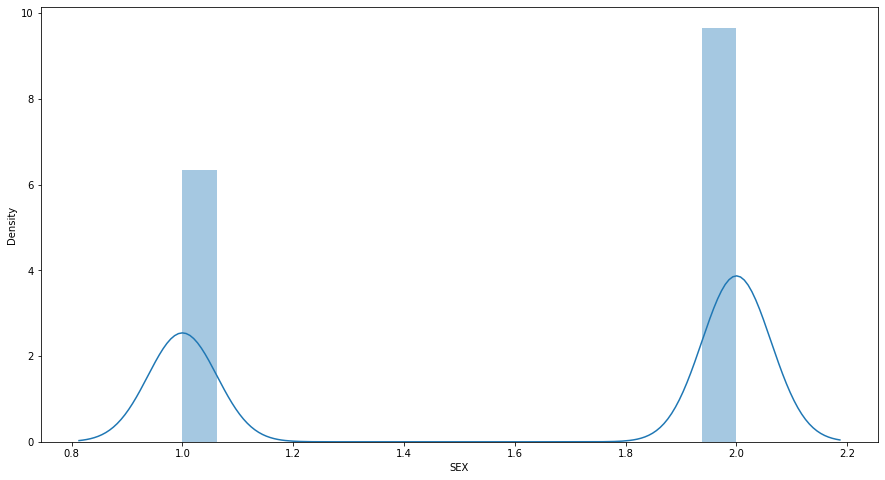

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(df["SEX"])
plt.show()

C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


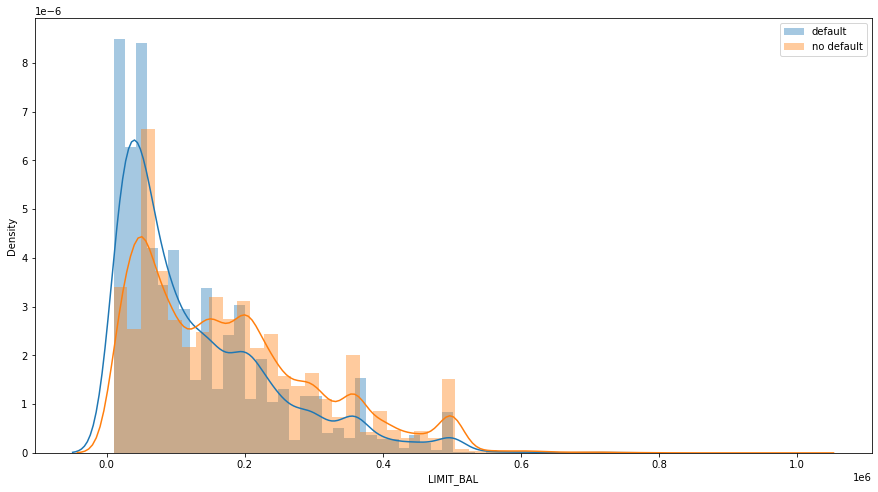

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(df[df["default"]==1]["LIMIT_BAL"], label='default')
sns.distplot(df[df["default"]==0]["LIMIT_BAL"], label='no default')
plt.legend()
plt.show()

In [34]:
df["SEX"].unique()

array([2, 1], dtype=int64)

In [35]:
# Education has only 4 categorical levels, removing columns with higher values
df = df[df["EDUCATION"]<=4]

In [36]:
pay_cols = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

categorical_columns = ["SEX", "EDUCATION", "MARRIAGE"] + pay_cols
continuous_columns = [c for c in df.columns if c not in categorical_columns + ["default"]]
target_col = "default"

In [157]:
# male=1, female=2 => male=1, female=0
df["feature_SEX"] = (df["SEX"] == 1)
df["feature_MARRIAGE"] = (df["MARRIAGE"] == 1)

# Education encoding
#edu_encoder = OneHotEncoder()
#df[["edu_0", "edu_1", "edu_2", "edu_3", "edu_4"]] = edu_encoder.fit_transform(df["EDUCATION"].values.reshape(-1, 1)).toarray()

# encoding the columns having categorical values for pyment due
#enc = OneHotEncoder()
#enc.fit(df[pay_cols[0]].values.reshape(-1, 1))

#for col in pay_cols:
#    df[[f"PAY_{col[-1]}_{ix}" for ix in range(-2, 9)]] = enc.transform(df[col].values.reshape(-1, 1)).toarray()

# Encoding marrige column

#marrige_encoder = OneHotEncoder()
#df[["marriage_0", "marriage_1", "marriage_2", "marriage_3"]] = marrige_encoder.fit_transform(df["MARRIAGE"].values.reshape(-1, 1)).toarray()

In [158]:
bill_cols = [c for c in df.columns if "BILL_AMT" in c][:-1]
pay_amt_cols = [c for c in df.columns if "PAY_AMT" in c][1:]

zero_payments = df[df[bill_cols].sum(1)==0]
df = df.drop(zero_payments.index, axis=0)

neg_bill = df[df[bill_cols].sum(1)<0]
df = df.drop(neg_bill.index, axis=0)

pay2bill = ((df[pay_amt_cols].sum(1).values)/(df[bill_cols].sum(1)))
df["pay_bill_rat"] = pay2bill

df = df[df["pay_bill_rat"]<=2]

In [159]:
feature_names = [f for f in df.columns if f not in categorical_columns+["default"]]

In [160]:
feature_names

['credit_score',
 'AGE',
 'feature_SEX',
 'edu_0',
 'edu_1',
 'edu_2',
 'edu_3',
 'edu_4',
 'marriage_0',
 'marriage_1',
 'marriage_2',
 'marriage_3',
 'pay_bill_rat',
 'feature_MARRIAGE']

<AxesSubplot:>

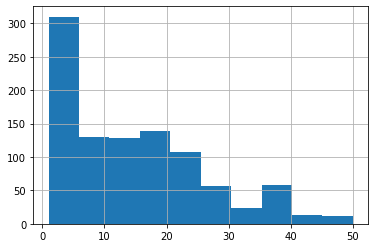

In [161]:
df[df[feature_names]["pay_bill_rat"]==0]["credit_score"].hist()
#Lower credits->ratio zero(bad payers)

In [162]:
X = df.drop(["default"], axis=1).astype(float)
y = df["default"].astype(float)

In [163]:
(df["default"]==1).mean()

0.21962972356074056

In [164]:
continuous_cols = ['credit_score', 'AGE', 'pay_bill_rat']
descret_cols = ["EDUCATION", "feature_MARRIAGE"]

to_normalize = continuous_cols + descret_cols

## Experiment with Cross Validation

In [165]:
feature_names = ['credit_score', 'AGE', 'feature_SEX', 'EDUCATION', 'feature_MARRIAGE', 'pay_bill_rat']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X[feature_names], y, test_size=0.2)

sc = MinMaxScaler()
X_train[to_normalize] = sc.fit_transform(X_train[to_normalize])
X_test[to_normalize] = sc.transform(X_test[to_normalize])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train.mean()

0.21856884057971016

In [173]:
def get_model():
    model = models.Sequential()
    model.add(L.Dense(16, input_dim = (len(feature_names)), activation="relu"))
    model.add(L.Dense(1, activation="sigmoid"))

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy", "AUC"])

    return model

In [174]:
model = get_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
folds = KFold(n_splits=5)
#folds = LeaveOneOut()

hist_arr = []
models_arr = []
validation_metrics =[]

for train_idx, val_idx in folds.split(X_train, y_train):
    print(train_idx, val_idx)
    print(len(train_idx), len(val_idx))

    X_tr, y_tr = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    model = get_model()

    hist = model.fit(X_tr, y_tr, epochs=20)
    hist_arr.append(hist)
    models_arr.append(model)

    model_scores = model.evaluate(X_val, y_val)
    validation_metrics.append(model_scores)

    break

In [175]:
df["default"]

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default, Length: 27601, dtype: int64

In [176]:
cated = pd.concat([X_train, y_train], axis=1)

In [177]:
defaulted = cated[cated["default"]==1]

In [178]:
defaulted.describe()

,credit_score,AGE,feature_SEX,EDUCATION,feature_MARRIAGE,pay_bill_rat,default
count,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.0
mean,0.113799,0.250443,0.435350,0.475186,0.481558,0.110130,1.0
std,0.111500,0.165376,0.495854,0.171984,0.499712,0.178887,0.0
min,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,1.0
25%,0.040404,0.120690,0.000000,0.250000,0.000000,0.017429,1.0
50%,0.070707,0.224138,0.000000,0.500000,0.000000,0.025711,1.0
75%,0.171717,0.362069,1.000000,0.500000,1.000000,0.090202,1.0
max,0.717172,0.896552,1.000000,1.000000,1.000000,0.996235,1.0


In [193]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
reg = RandomForestClassifier()
reg.fit(X_train, y_train)

In [179]:
hist = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test))

Epoch 1/40
690/690 [==============================] - 1s 749us/step - loss: 0.5202 - accuracy: 0.7814 - auc: 0.5840 - val_loss: 0.5129 - val_accuracy: 0.7761 - val_auc: 0.6474
Epoch 2/40
690/690 [==============================] - 0s 569us/step - loss: 0.5079 - accuracy: 0.7814 - auc: 0.6334 - val_loss: 0.5117 - val_accuracy: 0.7761 - val_auc: 0.6562
Epoch 3/40
690/690 [==============================] - 0s 567us/step - loss: 0.5065 - accuracy: 0.7814 - auc: 0.6370 - val_loss: 0.5093 - val_accuracy: 0.7761 - val_auc: 0.6588
Epoch 4/40
690/690 [==============================] - 0s 553us/step - loss: 0.5063 - accuracy: 0.7814 - auc: 0.6375 - val_loss: 0.5078 - val_accuracy: 0.7761 - val_auc: 0.6589
Epoch 5/40
690/690 [==============================] - 0s 586us/step - loss: 0.5061 - accuracy: 0.7814 - auc: 0.6384 - val_loss: 0.5080 - val_accuracy: 0.7761 - val_auc: 0.6589
Epoch 6/40
690/690 [==============================] - 0s 561us/step - loss: 0.5059 - accuracy: 0.7814 - auc: 0.6389 - va

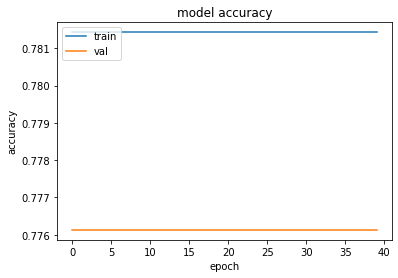

In [180]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

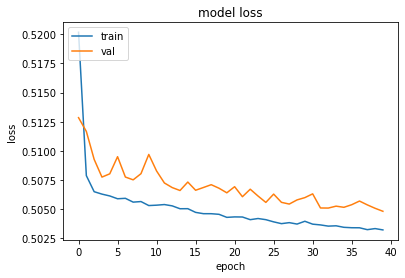

In [181]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


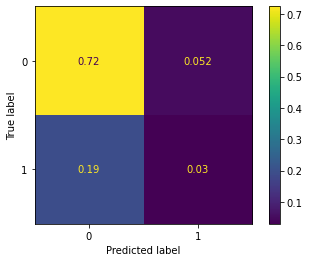

In [198]:
test_preds = reg.predict(X_test)
test_preds = (test_preds>=0.5).astype(int)

cm = metrics.confusion_matrix(y_test, test_preds, normalize="all")
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


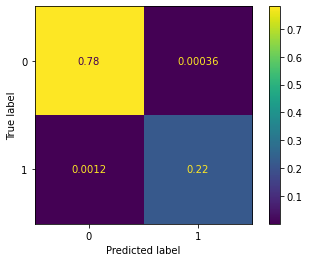

In [199]:
test_preds = reg.predict(X_train)
test_preds = (test_preds>=0.5).astype(int)

cm = metrics.confusion_matrix(y_train, test_preds, normalize="all")
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()




In [200]:
test_preds = reg.predict(X_train)
test_preds = (test_preds>=0.5).astype(int)

r2 = metrics.r2_score(y_train, test_preds)
r2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


0.9907191019472544